# Topicos de Astrofísica Moderna: Practica 1
## Orbitas
Cuando se trata de integrar orbitas en el tiempo, se suele trabajar debajo de un campo gravitatorio, el cual posee un potencial dado. Es por ello claro notar que si tenemos multiples campos gravitacionales tendremos distintos potenciales colaborando. Distintas componentes seran mejor representadas por tipos de potencial distintos.

Es natural entonces interpretar una galaxia en su totalidad como un conjunto de potenciales.

El notebook presenta distintas secciones, las enumeradas son consideradas como respuestas a las partes respectivas

### 2.-Getting Started

Para definir un potencial utilizando gala, se utiliza el modulo gala.potential, dependiendo del potencial a utilizar distintos parametros seran requeridos.

Luego para graficar orbitas se requieren condiciones iniciales y se hace uso del modulo gala.dynamics.

Es posible obtener directamente de la orbita el apocentro, pericentro y la eccentricidad.

In [3]:
import astropy.units as u
import numpy as np

In [6]:
import gala.potential as gp

In [12]:
mw = gp.MilkyWayPotential()
print(mw)
for key in mw.keys():
    print(key,"|",mw[key])

MilkyWayPotential
disk | MiyamotoNagaiPotential
bulge | HernquistPotential
nucleus | HernquistPotential
halo | NFWPotential


In [13]:
# What is the energy of this position?
r = [-8, 0, 0] * u.kpc
mw.energy(r)

<Quantity [-0.16440296] kpc2 / Myr2>

In [14]:
# What is the acceleration of this position
mw.acceleration(r)

<Quantity [[ 0.00702262],
           [-0.        ],
           [-0.        ]] kpc / Myr2>

In [16]:
# Transforming between units
E = mw.energy(r)
print(E.to((u.km/u.s)**2))
acc = mw.acceleration(r)
acc.to(u.km/u.s /u.Myr)

[-157181.98979398] km2 / s2


<Quantity [[ 6.86666358],
           [-0.        ],
           [-0.        ]] km / (Myr s)>

In [18]:
# Orbit integration
import gala.dynamics as gd
r = [-8.1,0,0.02] * u.kpc
v = [13,245,8.] * u.km/u.s
w0 = gd.PhaseSpacePosition(r,v)

In [19]:
print(w0)

pos=(-8.1, 0., 0.02) kpc
vel=(13., 245., 8.) km / s


In [21]:
mw.units

<UnitSystem (kpc, Myr, solMass, rad)>

In [22]:
# NOW we do orbit integration
orbit = mw.integrate_orbit(w0, dt=1*u.Myr, t1=0, t2=2*u.Gyr)
print(orbit)
# Orbit has been integrated!

pos=[(-8.1       ,  0.        ,  0.02      ),
 (-8.08324297,  0.25056448,  0.02812417),
 (-8.05955349,  0.50091407,  0.03608625), ...,
 ( 5.90047425, -6.78900628, -0.09316646),
 ( 5.7150971 , -6.91968148, -0.0976335 ),
 ( 5.52580522, -7.04561683, -0.10168795)] kpc
vel=[( 0.01329526,  0.25056448,  0.0081817 ),
 ( 0.02022326,  0.25045703,  0.00804313),
 ( 0.02715633,  0.25013412,  0.007858  ), ...,
 (-0.18336589, -0.13298933, -0.0046636 ),
 (-0.18733452, -0.12830528, -0.00426075),
 (-0.19119365, -0.12351052, -0.00383917)] kpc / Myr


In [35]:
import matplotlib
# Start visualization!

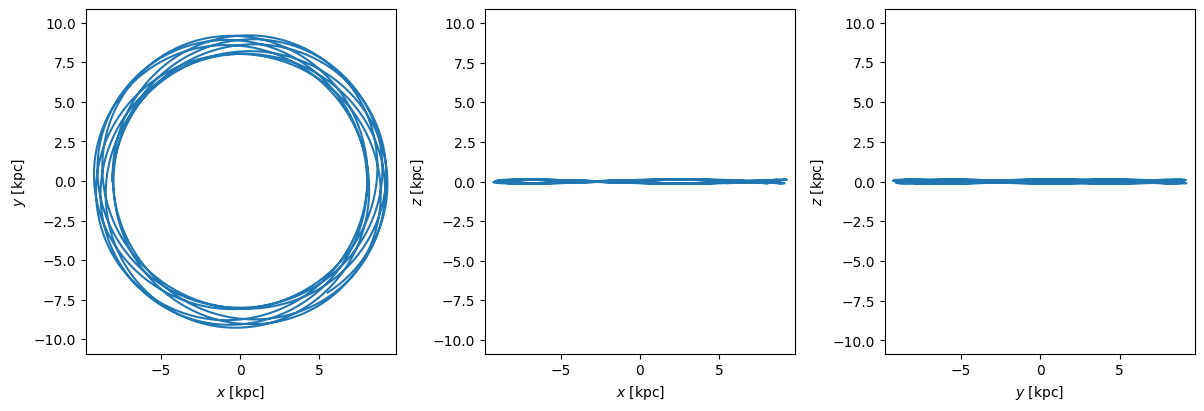

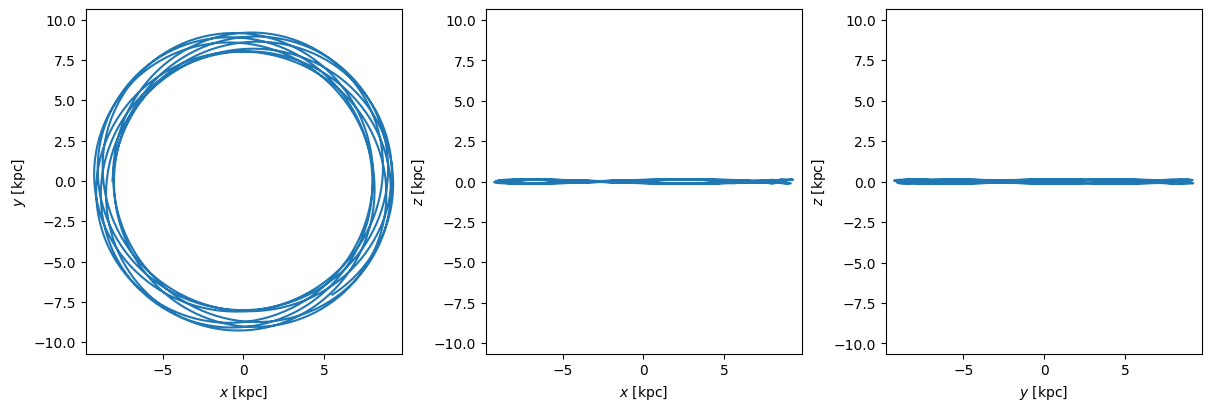

In [37]:
orbit.plot()

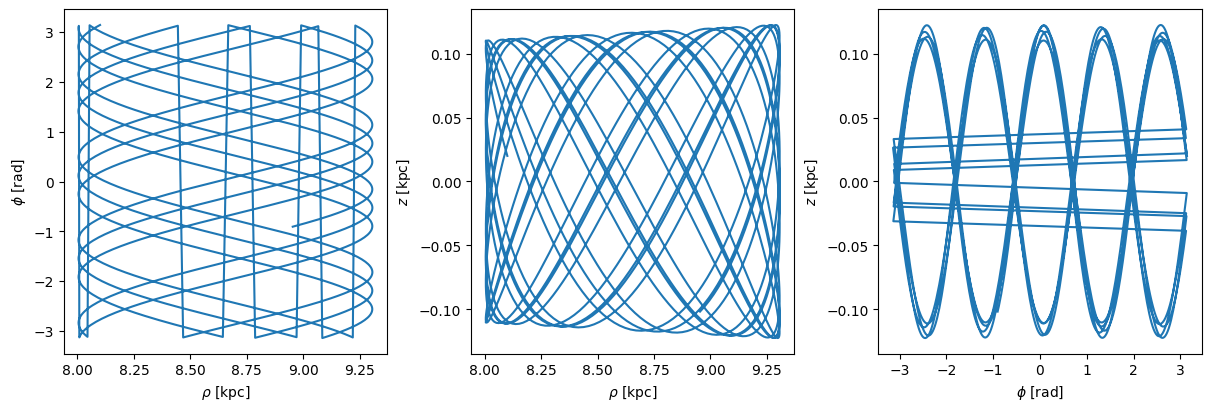

In [39]:
fig = orbit.cylindrical.plot()

In [42]:
# Now obtain specific information of orbit
pericenter = orbit.pericenter()
apocenter = orbit.apocenter()
eccentricity = orbit.eccentricity()
print("Pericentro: ",pericenter,"\nApocentro: ",apocenter,"\nExcentricidad: ",eccentricity)

Pericentro:  8.00498070444097 kpc 
Apocentro:  9.307219451956042 kpc 
Excentricidad:  0.07522086943027194


### Sandbox area

Area de pruebas y testeo, mas un show your work antes que nada
Carece de orden e importancia.

In [46]:
import astropy.units as u
import numpy as np
import gala.potential as gp

In [65]:
mw = gp.MilkyWayPotential()
print(mw)
for key in mw.keys():
    print(key,"|",mw[key])
    print(mw[key].c_parameters)

MilkyWayPotential
disk | MiyamotoNagaiPotential
[6.8e+10 3.0e+00 2.8e-01]
bulge | HernquistPotential
[5.e+09 1.e+00]
nucleus | HernquistPotential
[1.71e+09 7.00e-02]
halo | NFWPotential
[5.400e+11 1.562e+01 1.000e+00 1.000e+00 1.000e+00]


In [78]:
# m= scale mass|r_s= scale radius
# a= major axis scale
# b= Intermediate axis scale
# c= Minor axis scale
dmhalo = gp.potential.NFWPotential(m=1,r_s=2, a=3, b=4, c=5)
dmhalo.c_parameters

array([1., 2., 3., 4., 5.])

In [89]:
from gala.units import galactic

In [94]:
dmhalo = gp.potential.NFWPotential.from_circular_velocity(v_c = 200*u.km/u.s, r_s=10*u.kpc,units=galactic)
dmhalo.c_parameters

array([4.81515786e+11, 1.00000000e+01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00])

In [91]:
import gala.dynamics as gd

In [92]:
r = [10, 0, 0] * u.kpc
v = [0, 175, 0] * u.km/u.s

ics = gd.PhaseSpacePosition(pos=r,vel=v)
orbit = gp.Hamiltonian(dmhalo).integrate_orbit(ics, dt=2., n_steps=2000)

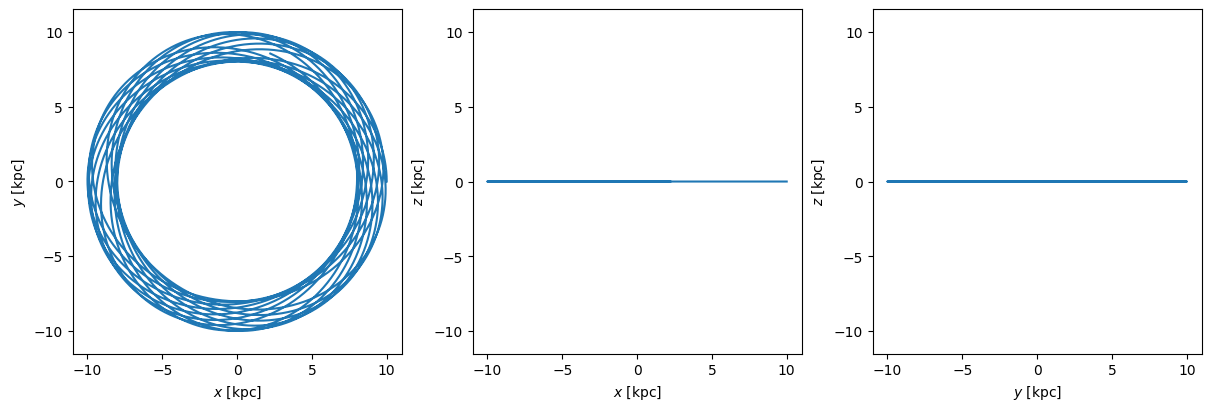

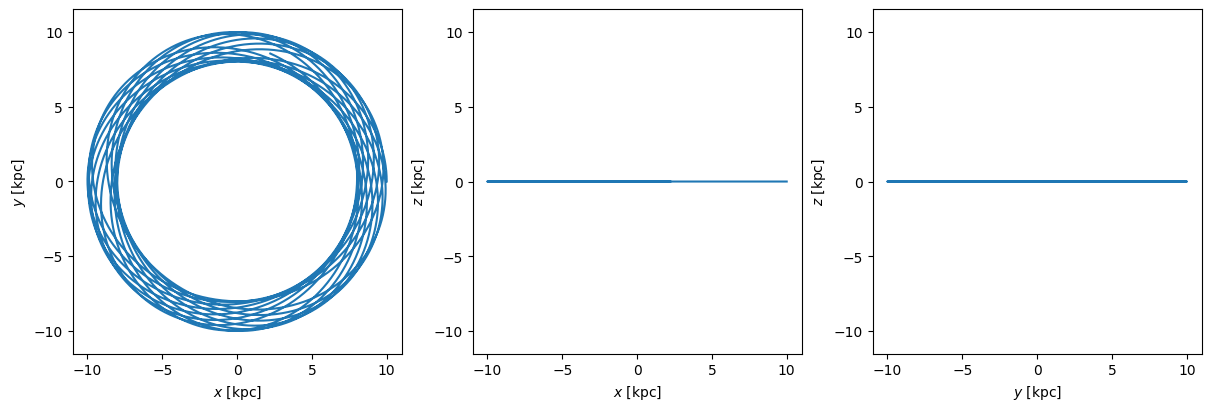

In [93]:
orbit.plot()

### 3.-Definiendo un potencial de una galaxia late-type L*

Ahora si quieres definir un potencial de una galaxia late-type(disco presente), L*(masa similar MW), entonces se requieren distintos potenciales para cada componente.

In [191]:
import astropy.units as u
import numpy as np
import gala.potential as gp
from gala.units import galactic
import matplotlib.pyplot as plt

# Probando a construir potenciales ;D
gal_dm_halo = gp.NFWPotential.from_circular_velocity(v_c=200*(u.km/u.s), r_s=10*u.kpc, units=galactic)
gal_bulge = gp.PlummerPotential(m=1e11*u.M_sun, b=0.7, units=galactic)
gal_nucleus = gp.PlummerPotential(m=1e11*u.M_sun, b=1, units=galactic)
gal_disk = gp.KuzminPotential(m=1e10*u.M_sun, a=0.8, units=galactic)

In [187]:
gal_potential = gp.CCompositePotential()
gal_potential['bulge'] = gal_bulge
gal_potential['disk'] = gal_disk
gal_potential['nucleus'] = gal_nucleus
gal_potential['halo'] = gal_dm_halo

In [188]:
[gal_potential[key] for key in gal_potential.keys()],'\n',[mw[key] for key in mw.keys()]

([<PlummerPotential: m=1.00e+11, b=0.70 (kpc,Myr,solMass,rad)>,
  <KuzminPotential: m=1.00e+10, a=0.80 (kpc,Myr,solMass,rad)>,
  <PlummerPotential: m=1.00e+11, b=1.00 (kpc,Myr,solMass,rad)>,
  <NFWPotential: m=4.82e+12, r_s=100.00, a=1.00, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>],
 '\n',
 [<MiyamotoNagaiPotential: m=6.80e+10, a=3.00, b=0.28 (kpc,Myr,solMass,rad)>,
  <HernquistPotential: m=5.00e+09, c=1.00 (kpc,Myr,solMass,rad)>,
  <HernquistPotential: m=1.71e+09, c=0.07 (kpc,Myr,solMass,rad)>,
  <NFWPotential: m=5.40e+11, r_s=15.62, a=1.00, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>])

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='$R$ [$\\mathrm{kpc}$]', ylabel='$v_{\\rm circ}$ [$\\mathrm{km\\,s^{-1}}$]'>)

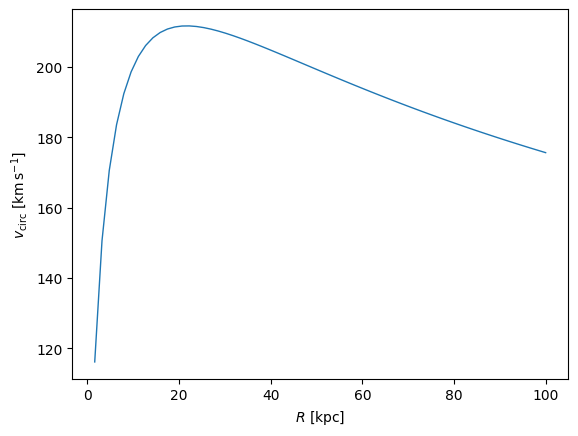

In [192]:
grid = np.linspace(0,1e2,64)
gal_dm_halo.plot_rotation_curve(R_grid=grid)

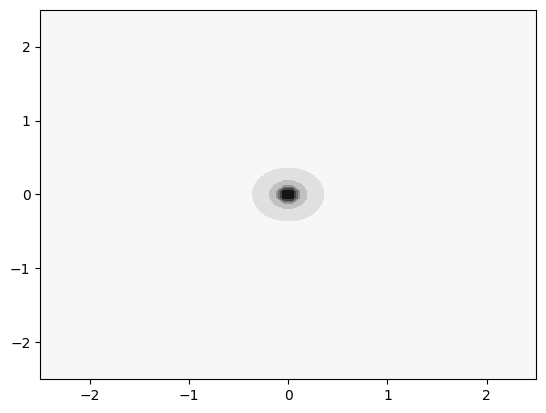

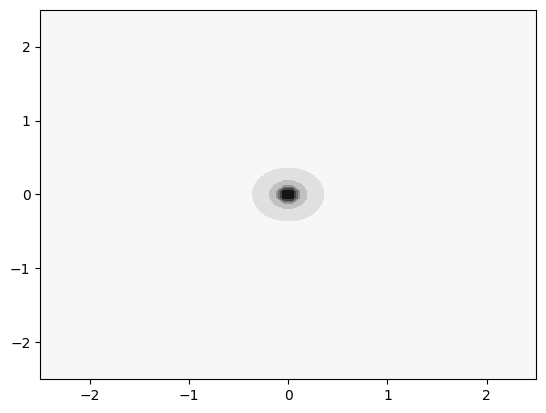

In [196]:
grid = np.linspace(-2.5,2.5,64)
gal_dm_halo.plot_density_contours(grid=(grid,0,grid),cmap='Greys')

### 3.-Creacion de un potencial para una Galaxy late-type L*

Entonces la estrategia provista para crear el potencial completo consiste en apuntar a una conjuncion
o un conjunto de potenciales, donde cada uno representara una componente de la galaxia.
Considerando la aproximacion realizada, se trata de una galaxia S0 con una masa de 10^11M_sun
Para adaptar los parametros del resto de componentes se toma un disk to total mass ratio de 50%, nucleus to total de 10% y un bulge to toal de 40%, tendriamos en este caso una zona centrar importante y un disco sin brazos.
Una galaxia lenticular.

In [2]:
import astropy.units as u
import numpy as np
import gala.potential as gp
from gala.units import galactic
import matplotlib.pyplot as plt

def create_gal_potential(total_mass, r_s, dm_fraction=0.73,
                         disk_total=0.7,bulge_total=0.29,
                         nucleus_total=0.01,
                         units=galactic):
    bar_mass = total_mass*(1-dm_fraction)
    dm_mass = total_mass*dm_fraction
    bulge_mass = bar_mass*bulge_total
    disk_mass = bar_mass*disk_total
    nucleus_mass = bar_mass*nucleus_total
    gal_potential = gp.CCompositePotential()
    gal_potential['halo'] = gp.NFWPotential(m=dm_mass,r_s=r_s,units=galactic)
    gal_potential['bulge'] = gp.PlummerPotential(m=bulge_mass, b=0.7, units=galactic)
    gal_potential['disk'] = gp.KuzminPotential(m=disk_mass, a=0.8, units=galactic)
    gal_potential['nucleus'] = gp.PlummerPotential(m=nucleus_mass, b=1, units=galactic)
    return(gal_potential)

pot = create_gal_potential(total_mass=1e11*u.M_sun, r_s=5*u.kpc)

     |████████████████████████████████| 12.7 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 38.6 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 18.2 MB 3.1 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.


/home/marcoritou/anaconda3/lib/python3.9/site-packages/gala/potential/potential/core.py:17: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.21.5)
  from scipy.spatial.transform import Rotation


TypeError: 'type' object is not subscriptable

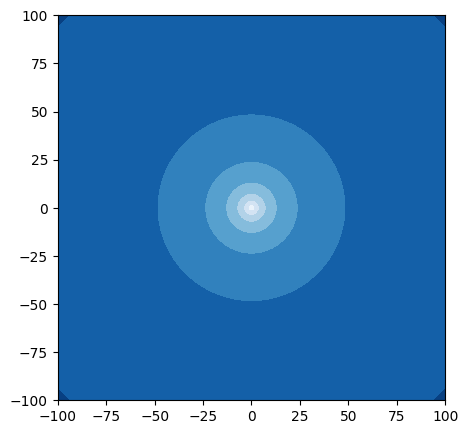

In [669]:
grid = np.linspace(-100,100,100)
fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = pot['halo'].plot_contours(grid=(grid,grid,0),filled=True, ax=ax)

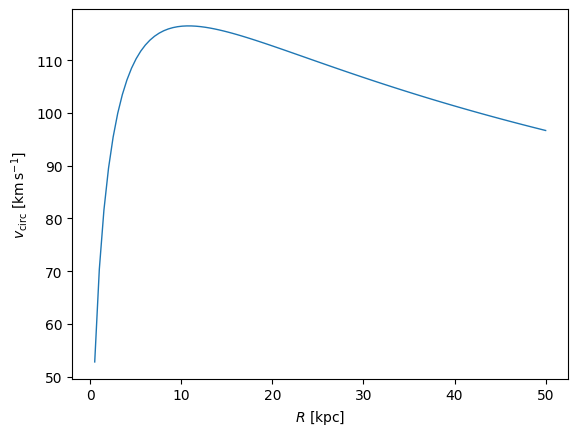

In [670]:
grid = np.linspace(0,50,100)
fig = pot['halo'].plot_rotation_curve(R_grid=grid)

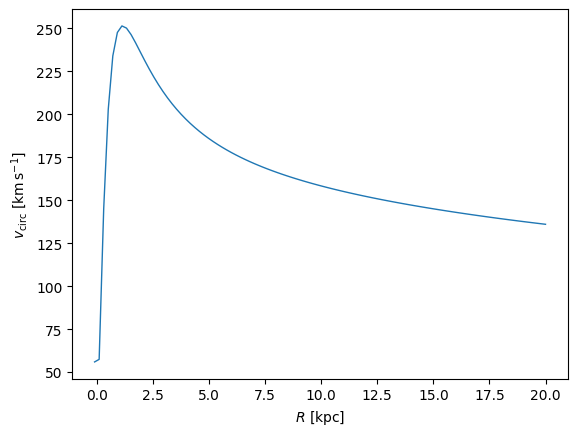

In [671]:
grid = np.linspace(-0.1,20,100)
fig = pot.plot_rotation_curve(R_grid=grid)

### 4.-Curvas de velocidad del potencial

Construir las curvas de velocidad es sencillo y se puede realizar directamente con los metodos provistos por el paquete.
Si vemos las curvas de rotacion de cada componente, podemos observar como la del halo de materia oscura es la que mas se extiende.

El paquete construye la curva de rotacion a partir de la gradiente del potencial y de la derivada respecto a r.

Esto es mas claro de observar considerando que la velocida circular es tal que:

$\frac{v_c(r)^2}{r} = \frac{d\phi}{dr}$

Entonces de la derivada del potencial con respecto al radio es trivial obtener la velocidad circular.

In [665]:
# Ya tenemos el potencial obtenido en la parte superior
# Consiste en multiples componentes, con distintos tipos de potenciales
[[key,pot[key]] for key in pot.keys()]

[['halo',
  <NFWPotential: m=7.30e+10, r_s=5.00, a=1.00, b=1.00, c=1.00 (kpc,Myr,solMass,rad)>],
 ['bulge', <PlummerPotential: m=1.08e+10, b=0.70 (kpc,Myr,solMass,rad)>],
 ['disk', <KuzminPotential: m=1.35e+10, a=0.80 (kpc,Myr,solMass,rad)>],
 ['nucleus', <PlummerPotential: m=2.70e+09, b=1.00 (kpc,Myr,solMass,rad)>]]

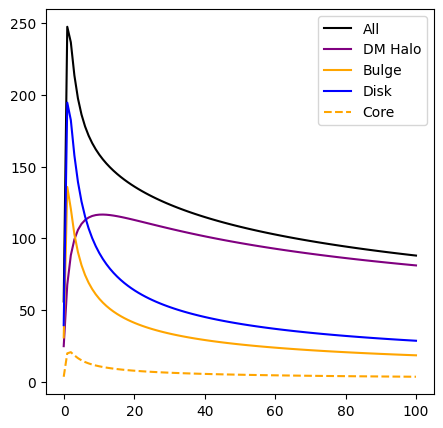

In [676]:
# Es sencillo ver la curva de rotacion de las componentes y del total
grid = np.linspace(-0.1,100,100)
fig, axes = plt.subplots(1,1,figsize=(5,5))
xyz = np.zeros((3,) + grid.shape)
xyz[0] = grid
Vcirc_all = pot.circular_velocity(xyz)
Vcirc_halo = pot['halo'].circular_velocity(xyz)
Vcirc_bulge = pot['bulge'].circular_velocity(xyz)
Vcirc_disk = pot['disk'].circular_velocity(xyz)
Vcirc_nucleus = pot['nucleus'].circular_velocity(xyz)

axes.plot(grid,Vcirc_all,c='black',label='All')
axes.plot(grid,Vcirc_halo,c='purple',label='DM Halo')
axes.plot(grid,Vcirc_bulge,c='orange',label='Bulge')
axes.plot(grid,Vcirc_disk,c='blue',label='Disk')
axes.plot(grid,Vcirc_nucleus,c='orange',linestyle='--',label='Core')

axes.legend()

### 5.-Integracion de orbitas

Zona de sandbox de orbitas, nuevamente un leve show your work.
Para integrar orbitas es sencillo y se requiere tan solo de condiciones iniciales y el potencial a utilizar, en el caso de aqui se realiza mediante un metodo de integracion leapfrog [source](https://gala.adrian.pw/en/latest/api/gala.integrate.LeapfrogIntegrator.html#gala.integrate.LeapfrogIntegrator), in a nutshell, consiste en integrar en dados pasos delta t, creando asi puntos discretos a partir de una funcion continua.

In [461]:
# Probemos a integrar orbitas solo en el potencial del halo generado!
# lesgo
import gala.dynamics as gd
import gala.potential as gp

Energy [-21139.12514479] km2 / s2


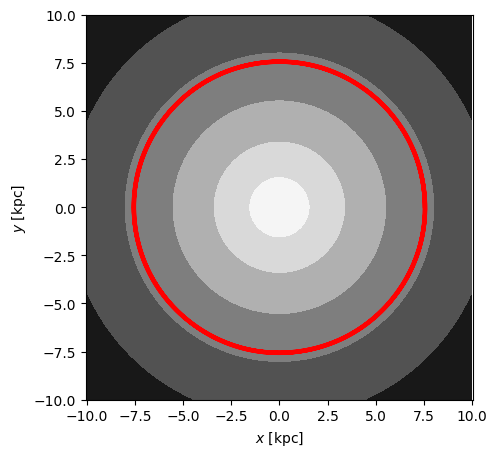

In [546]:
# Condiciones iniciales seleccionadas en base a la curva de rotacion del halo
r = [7.5,0,0] * u.kpc
v = [0, 65, 0] * u.km/u.s
ics_closed = gd.PhaseSpacePosition(pos=r,vel=v)
print('Energy',ics_closed.energy(pot['halo']).to(u.km**2/u.s**2))

closed_orbit = gp.Hamiltonian(pot['halo']).integrate_orbit(ics_closed, dt=2., n_steps=4e3)

grid = np.linspace(-10,10,100)

fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = pot['halo'].plot_contours(grid=(grid,grid,0),cmap='Greys', ax=ax)
fig = closed_orbit.plot(components=['x','y'], axes=[ax], color='red')

Energy [6040.91680647] km2 / s2


(-100.0, 100.0)

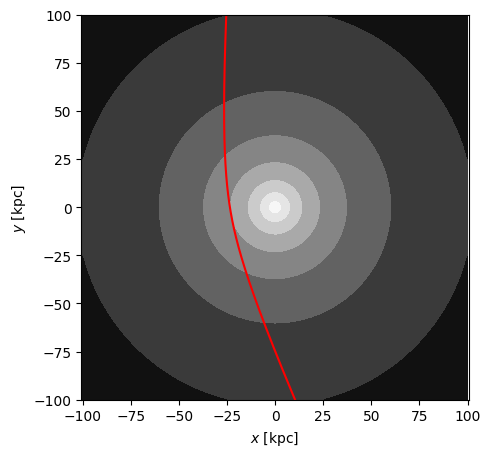

In [463]:
r = [100,-300,0] * u.kpc
v = [-60, 130, 0] * u.km/u.s
ics_hyperbolic = gd.PhaseSpacePosition(pos=r,vel=v)
print('Energy',ics_hyperbolic.energy(pot['halo']).to(u.km**2/u.s**2))

hyperbolic_orbit = gp.Hamiltonian(pot['halo']).integrate_orbit(ics_hyperbolic, dt=2., n_steps=4e3)

grid = np.linspace(-100,100,1000)

fig,ax = plt.subplots(1, 1, figsize=(5,5))
fig = pot['halo'].plot_contours(grid=(grid,grid,0),cmap='Greys', ax=ax)
fig = hyperbolic_orbit.plot(components=['x','y'], axes=[ax], color='red')
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)

### 6,7 y 8.-Iteracion de integracion de orbitas

#### Apocentro, pericentro y excentricidad
Como es conocido el apocentro y el pericentro son cualidades de las orbitas en sistemas, donde el primero indica el punto mas lejano de la orbita con respecto al origen, y el segundo indica el punto mas cercano al origen. Generalmente se toma como origen el centro de masa del sistema total, el objeto mas masivo(2 body/ n-body), o directamente en punto en donde el pozo de potencial es maximo.

La excentricidad entrega informacion sobre que tan circular es una orbita y viene dada por tanto el apocentro como el pericentro tal que:


$\epsilon = \frac{a - p}{a + p}$


En donde entre mas cercana es a 0, mas cicular es la orbita, esto hace sentido ya que si el apocentro y el pericentro fueran exactamente iguales, entonces la orbita siempre esta a una misma distancia del origen(circulo).

#### Detalles del calculo
En el caso de gala el calculo del apocentro y el pericentro es relativamente similar.
Es estimado mediante la identificacion de los minimos locales en los radios esfericos(distancia al centro), luego se ajustan parabola en estos mismos. Esencialmente se obtiene una lista de pericentros minimos. luego para obtener el pericentro se toma el promedio de esta lista de pericentros.

Para el apocentro el proceso es exactamente igual solo aplicado a maximos locales.

Luego la excentricidad se calcula directamente del apocentro y pericentro obtenido de la misma manera.

/home/mbugueno/anaconda3/envs/galaenv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/mbugueno/anaconda3/envs/galaenv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


------------------------------------------------------------------------------------
halo|
------------------------------------------------------------------------------------
Std deviation of Energy
2.1233488817591026e-07 kpc2 / Myr2 
 1.6995703515248716e-08 kpc2 / Myr2
Std deviation of Ang.Mom
8.717826794696205e-16 kpc2 / Myr 
 4.089633879763743e-14 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|
------------------------------------------------------------------------------------
Std deviation of Energy
1.5341966380582597e-06 kpc2 / Myr2 
 2.1072155256208674e-08 kpc2 / Myr2
Std deviation of Ang.Mom
9.119181499041595e-16 kpc2 / Myr 
 3.9992476780203906e-14 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|disk|
------------------------------------------------------------------------------------
Std deviation of Energy
3.1722651335551356e-05 kpc2 / Myr2 
 3.4268790163152

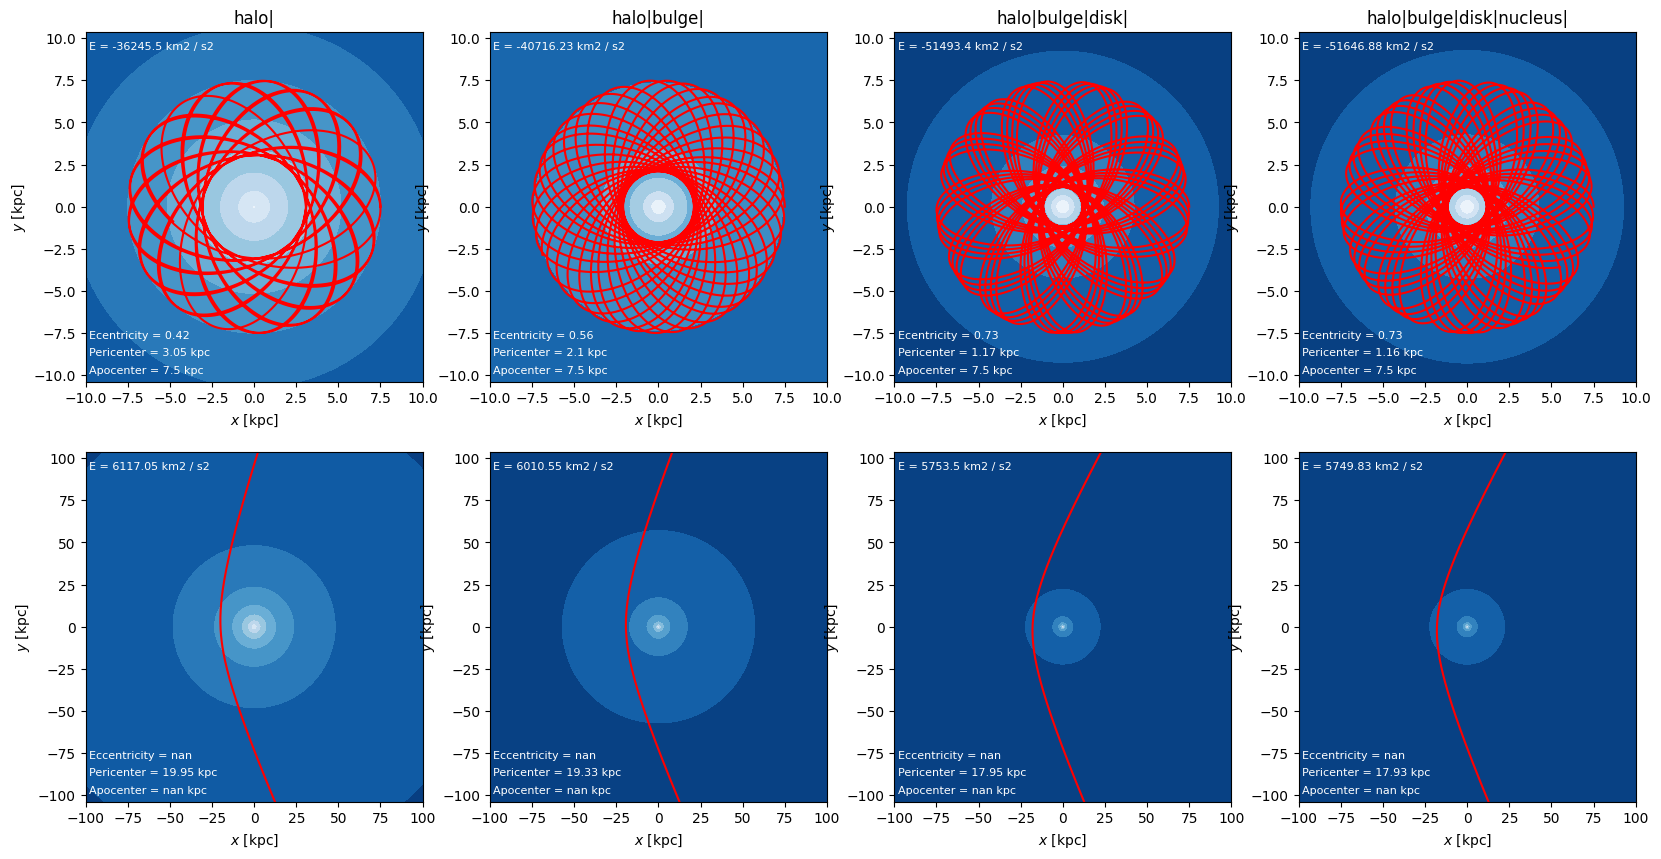

In [677]:
# Ahora poseemos dos orbitas, una cerrada y una hiperbolica(sale del sistema) 
# Se procede a graficar cada orbita a medida que se agregan componentes
txtsize = 8

r = [7.5,0,0] * u.kpc
v = [0, 65, 0] * u.km/u.s
ics_closed = gd.PhaseSpacePosition(pos=r,vel=v)

r = [100,-300,0] * u.kpc
v = [-60, 130, 0] * u.km/u.s
ics_hyperbolic = gd.PhaseSpacePosition(pos=r,vel=v)

fig,axes = plt.subplots(2,4,figsize=(20,10))

sumpot = gp.CCompositePotential()
i = 0
grid_closed = np.linspace(-15,15,1000)
grid_hypebolic = np.linspace(-150,150,1000)
components_str = ''
for key in pot.keys():
    sumpot[key] = pot[key]
    sumpot.plot_contours(grid=(grid_closed,grid_closed,0), ax=axes[0,i])
    sumpot.plot_contours(grid=(grid_hypebolic,grid_hypebolic,0), ax=axes[1,i])
    closed_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_closed, dt=0.6, n_steps=1e4)
    closed_orbit.plot(components=['x','y'], axes=[axes[0,i]], color='red')
    hyperbolic_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_hyperbolic, dt=1., n_steps=6e3)
    hyperbolic_orbit.plot(components=['x','y'], axes=[axes[1,i]], color='red')
    components_str += key + '|'
    axes[0,i].set_title(f'{components_str}')
    axes[0,i].set_xlim(-10,10)
    axes[0,i].set_ylim(-10,10)
    axes[1,i].set_xlim(-100,100)
    axes[1,i].set_ylim(-100,100)
    # texto con apocentros y datos
    closed_energy = np.round(ics_closed.energy(sumpot).to(u.km**2/u.s**2)[0],2)
    closed_apocenter = np.round(closed_orbit.apocenter(),2)
    closed_pericenter = np.round(closed_orbit.pericenter(),2)
    closed_eccentricity = np.round(closed_orbit.eccentricity(),2)
    hyperbolic_energy = np.round(ics_hyperbolic.energy(sumpot).to(u.km**2/u.s**2)[0],2)
    hyperbolic_apocenter = np.round(hyperbolic_orbit.apocenter(),2)
    hyperbolic_pericenter = np.round(hyperbolic_orbit.pericenter(),2)
    hyperbolic_eccentricity = np.round(hyperbolic_orbit.eccentricity(),2)
    axes[0,i].text(0.01,0.95,f'E = {closed_energy}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.025,f'Apocenter = {closed_apocenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.075,f'Pericenter = {closed_pericenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.125,f'Ecentricity = {closed_eccentricity}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[1,i].text(0.01,0.95,f'E = {hyperbolic_energy}',transform=axes[1,i].transAxes,size=txtsize,c='white')
    axes[1,i].text(0.01,0.025,f'Apocenter = {hyperbolic_apocenter}',transform=axes[1,i].transAxes,size=txtsize,c='white')
    axes[1,i].text(0.01,0.075,f'Pericenter = {hyperbolic_pericenter}',transform=axes[1,i].transAxes,size=txtsize,c='white')
    axes[1,i].text(0.01,0.125,f'Eccentricity = {hyperbolic_eccentricity}',transform=axes[1,i].transAxes,size=txtsize,c='white')
    # Podemos saber si seleccionamos dt corecto si vemos que la energia se conserva
    print('-'*84)
    print(components_str)
    print('-'*84)
    print('Std deviation of Energy')
    print(np.std(closed_orbit.energy()),'\n',np.std(hyperbolic_orbit.energy()))
    print('Std deviation of Ang.Mom')
    # Y que tambien el momentum angular lo hace
    print(np.std(closed_orbit.angular_momentum()[2,:]),'\n',np.std(hyperbolic_orbit.angular_momentum()[2,:]))
    i += 1

fig.savefig('Orbitas_en_potenciales.png',dpi=100)

#### Analisis de los cambios en las orbitas
A medida que se agregan componentes podedmos notar como las orbitas varian, esto es natural debido a que el sistema al agregar componentes se vuelve mas masivo con respecto a antes, al fin y al cabo estamos agregando masa, o sea estamos agregando campo gravitacional, ejerciendo mayor fuerza sobre el objeto en orbita.

Sin embargo es importante notar el caso de la orbita cerrada(bound), como la misma se vuelve mas caotica, esto se debe a que la eleccion de las condiciones iniciales de esta orbita fue tomando la curva de rotacion del halo por si solo, entonces claramente al agregar componentes y cambiar asi el potencial total, la curva de rotacion cambia de igual manera, dejando asi a la orbita fuera de aquellas orbitas estables.

El caso de la orbita hiperbolica es mas sencillo ya que se eligieron condiciones iniciales extremadas, siendo similar a un objeto que atraviesa la galaxia a altas velocidades, superando la energia de escape, claramente en el caso de la orbita hiperbolica no tiene sentido ni el concepto de eccentricidad ni de apocentro.

### Bonus area

mainly plotting other stuff to test.

(-10.0, 10.0)

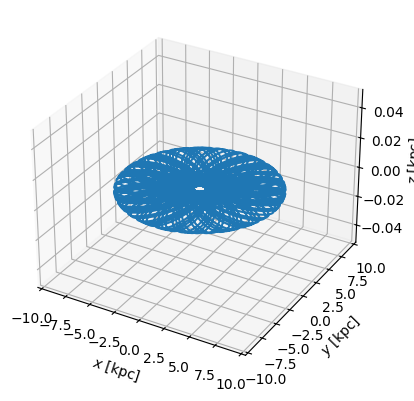

In [599]:
# Como se veria una orbita en 3d?
ax = plt.figure().add_subplot(projection='3d')
closed_orbit.plot_3d(ax=ax)
ax.set_ylim(-10,10)
ax.set_xlim(-10,10)

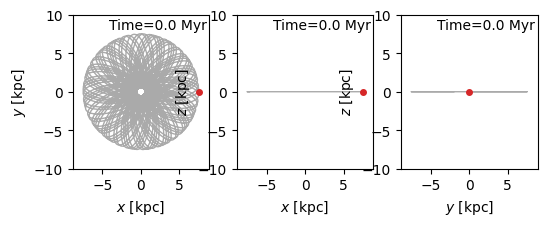

In [600]:
# Es posible hacer animaciones de las orbitas integradas! :D
fig, axes = plt.subplots(1,3,figsize=(6,2))

fig,anim = closed_orbit.animate(axes=axes,segment_nsteps=10000)
for ax in axes:
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
anim.save('test.mp4')

------------------------------------------------------------------------------------
halo|
------------------------------------------------------------------------------------
4.7601115890406635e-09 kpc2 / Myr2
9.46152763942474e-16 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|
------------------------------------------------------------------------------------
4.652187567065908e-05 kpc2 / Myr2
6.303381198848798e-16 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|disk|
------------------------------------------------------------------------------------
0.011274320033799048 kpc2 / Myr2
1.3725908215543531e-15 kpc2 / Myr
------------------------------------------------------------------------------------
halo|bulge|disk|nucleus|
------------------------------------------------------------------------------------
0.05237909448228886 kpc2 / Myr2
9.085964301788178e-14 kpc2 

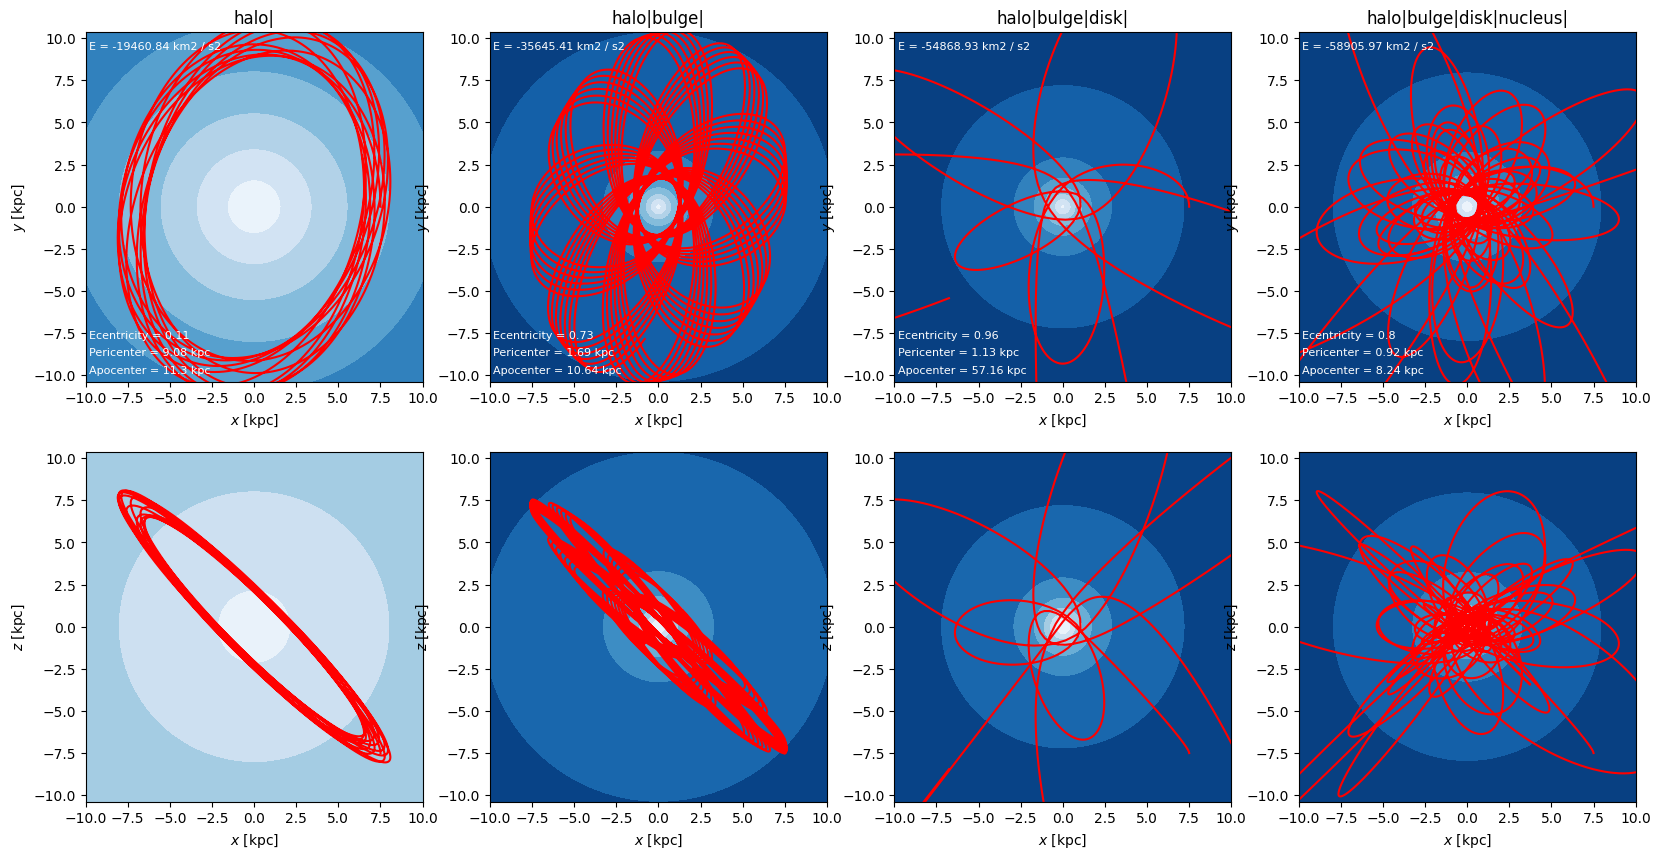

In [601]:
# Y orbitas en 3d?
# Esto es mas por que si, al fin y al cabo me la juego
# a que el potencial del disco deje las cosas peor jaja
txtsize = 8

r = [7.5,0,-7.5] * u.kpc
v = [0, 65, 15] * u.km/u.s
ics_closed = gd.PhaseSpacePosition(pos=r,vel=v)

fig,axes = plt.subplots(2,4,figsize=(20,10))

sumpot = gp.CCompositePotential()
i = 0
grid_closed = np.linspace(-15,15,1000)
grid_hypebolic = np.linspace(-150,150,1000)
components_str = ''
for key in pot.keys():
    sumpot[key] = pot[key]
    sumpot.plot_contours(grid=(grid_closed,grid_closed,0), ax=axes[0,i])
    sumpot.plot_contours(grid=(grid_hypebolic,grid_hypebolic,0), ax=axes[1,i])
    closed_orbit = gp.Hamiltonian(sumpot).integrate_orbit(ics_closed, dt=1., n_steps=1e4)
    closed_orbit.plot(components=['x','y'], axes=[axes[0,i]], color='red')
    closed_orbit.plot(components=['x','z'], axes=[axes[1,i]], color='red')
    components_str += key + '|'
    axes[0,i].set_title(f'{components_str}')
    axes[0,i].set_xlim(-10,10)
    axes[0,i].set_ylim(-10,10)
    axes[1,i].set_xlim(-10,10)
    axes[1,i].set_ylim(-10,10)
    # texto con apocentros y datos
    closed_energy = np.round(ics_closed.energy(sumpot).to(u.km**2/u.s**2)[0],2)
    closed_apocenter = np.round(closed_orbit.apocenter(),2)
    closed_pericenter = np.round(closed_orbit.pericenter(),2)
    closed_eccentricity = np.round(closed_orbit.eccentricity(),2)
    axes[0,i].text(0.01,0.95,f'E = {closed_energy}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.025,f'Apocenter = {closed_apocenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.075,f'Pericenter = {closed_pericenter}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    axes[0,i].text(0.01,0.125,f'Ecentricity = {closed_eccentricity}',transform=axes[0,i].transAxes,size=txtsize,c='white')
    # Podemos saber si seleccionamos dt corecto si vemos que la energia se conserva
    print('-'*84)
    print(components_str)
    print('-'*84)
    print(np.std(closed_orbit.energy()))
    # Y que tambien el momentum angular lo hace
    print(np.std(closed_orbit.angular_momentum()[2,:]))
    i += 1

fig.savefig('Orbitas_en_potenciales_edgeface.png',dpi=100)

(-10.0, 10.0)

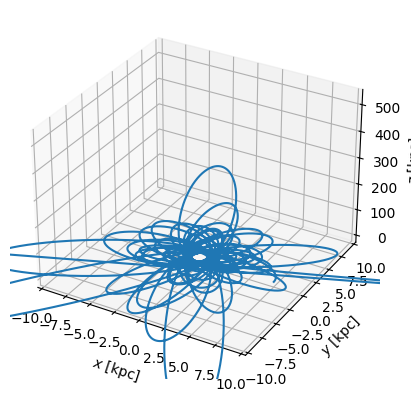

In [602]:
# Como se veria una orbita en 3d?
ax = plt.figure().add_subplot(projection='3d')
closed_orbit.plot_3d(ax=ax)
ax.set_ylim(-10,10)
ax.set_xlim(-10,10)